<a href="https://colab.research.google.com/github/invivoanima/2022python/blob/main/5_6%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

일일 루틴 검사 프로그램 만들기

시작화면

-교사용 관리 로그인

--학생 조회하기

--안한 사람 찾기

--로그아웃



-학생 로그인

--일괄 추가하기

--추가 안한 것 조회하기

--개별 추가하기

--로그아웃

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
# 한글 폰트 설치(코랩만 작동)
!apt-get install fonts-nanum -qq > /dev/null # 한글폰트설치
!fc-cache -fv
import matplotlib as mpl 
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from IPython.display import clear_output
import csv
import matplotlib.pyplot as plt
import time


# 관리자 아이디
admin_id = 'admin'
admin_pw = '1q2w3e4r'
admin_login = False


# 학생 명단 불러오기
classlist = []
name = csv.reader(open('name.csv'))
next(name)
for row in name :
  classlist.append(row[0])


# 할 일 명단 불러오기
todolist = []
todo = csv.reader(open('todolist.csv'))
next(todo)
for row in todo :
  todolist.append(row[0])


# 할 일 명단 갯수만큼 체크리스트 만들기(리스트 안에 리스트)
checklist = []
for i in range(len(todolist)) :
  checklist.append([])


# 안한 사람 리스트
nogood = []


# 그래프 변환을 위한 인원 카운트
goodcount = []


while True:
  clear_output()
  print('┏━━━━━━━━━━━━━━━━━━━━━┓')
  print('┃        오늘 할 일은 다 했나요?           ┃')
  print('┃  1) 학생 로그인                          ┃')
  print('┃  2) 선생님 로그인                        ┃')
  print('┗━━━━━━━━━━━━━━━━━━━━━┛')
  time.sleep(0.5)
  input_text = input('원하는 메뉴의 숫자를 적어주세요. :')
  if input_text == '2' :
    input_id = input('아이디를 입력해주세요. :')
    input_pw = input('비밀번호를 입력해주세요. :')
    if input_id == admin_id and input_pw == admin_pw : 
      admin_login = True
      while admin_login is True : 
        clear_output()
        print('┏━━━━━━━━━━━━━━━━━━━━━┓')
        print('┃        오늘 할 일은 다 했나요?           ┃')
        print('┃  선생님, 무엇을 하실건가요?              ┃')
        print('┃  1) 등록된 학생 조회하기                 ┃')
        print('┃  2) 아직 안한 사람 찾기                  ┃')
        print('┃  3) 종목별 참여율 조회                   ┃')
        print('┃  4) 로그아웃                             ┃')
        print('┗━━━━━━━━━━━━━━━━━━━━━┛')
        time.sleep(0.5)
        input_text = input('원하는 메뉴의 숫자를 적어주세요. :')
        if input_text == '1' :
          print('등록된 학생은 총 ' + str(len(classlist)) + '명 입니다.')
          print('학생의 명단은 다음과 같습니다.')
          print(*classlist, sep = ' ')
          input('계속하려면 엔터를 눌러주세요.')

        if input_text == '2' :
          print('아직 참여하지 않은 학생을 조회합니다.')
          for i in range(len(todolist)) :
            for j in range(len(classlist)) :
              if classlist[j] not in checklist[i] : 
                nogood.append(classlist[j])
            print(todolist[i] + '를 하지 않은 학생은 다음과 같습니다.')
            print(*nogood, sep = ' ')
            nogood = []
            print('')
          input('계속하려면 엔터를 눌러주세요.')

        if input_text == '3' :
          print('오늘의 참여율을 막대그래프로 나타냅니다.')
          for i in range(len(todolist)) :
            goodcount.append(len(checklist[i]))
          plt.rcParams['axes.unicode_minus'] = False 
          plt.rc('font', family = 'NanumGothic')
          plt.title('오늘의 할 일 현황')
          plt.bar(todolist, goodcount)
          plt.show()
          input('계속하려면 엔터를 눌러주세요.')
        if input_text == '4' :
          admin_login = False

    else :
      print('아이디 또는 비밀번호가 맞지 않습니다.')

  if input_text == '1' :
    input_id = input('이름을 입력해주세요. :')
    if input_id in classlist : 
      student_login = True
      while student_login == True : 
        clear_output()
        login_student = classlist.index(input_id)
        print('┏━━━━━━━━━━━━━━━━━━━━━┓')
        print('┃  안녕하세요! ' + input_id + '님. 할 일은 다 했나요?┃')
        print('┃  무엇을 하실건가요?                      ┃')
        print('┃  1) 한꺼번에 추가하기                    ┃')
        print('┃  2) 안한 일 찾기                         ┃')
        print('┃  3) 개별로 추가하기                      ┃')
        print('┃  4) 개별 삭제하기(실수로 추가한 것)      ┃')
        print('┃  5) 로그아웃                             ┃')
        print('┗━━━━━━━━━━━━━━━━━━━━━┛')
        time.sleep(0.5)
        input_text = input('원하는 메뉴의 숫자를 적어주세요. :')
        if input_text == '1' :
          print('오늘 한 일을 한꺼번에 확인합니다.')
          for i in range(len(todolist)) :
            while True : 
              input_todo = input(str(todolist[i]) + '은 했나요? (Y/N) : ')
              if input_todo == 'Y' or input_todo == 'y' :
                if input_id not in checklist[i] : 
                  checklist[i].append(input_id)
                break
              elif input_todo == 'N' or input_todo == 'n' :
                if input_id in checklist[i] :
                  checklist[i].remove(input_id)
                break
              else :
                print('y 또는 n으로 다시 입력해주세요.')

        if input_text == '2' : 
          print('아직 하지 않은 일을 찾습니다.')
          nottodolist = ''
          for i in range(len(todolist)) :
            if str(input_id) not in checklist[i] :
              nottodolist = nottodolist + ' ' + todolist[i]
          print('아직 하지 않은 일은' + nottodolist + '입니다.')
          input('계속하려면 엔터를 눌러주세요.')
        
        if input_text == '3' : 
          while True :
            clear_output()
            print('┏━━━━━━━━━━━━━━━━━━━━━┓')
            print('┃  어떤 일을 추가할 건가요?                ┃')
            for i in range(len(todolist)) :
              print('┃  ' + str(i + 1) + ') ' + todolist[i] + '                          ┃')
            print('┃  ' + str(i + 2) + ') 뒤로가기                             ┃')
            print('┗━━━━━━━━━━━━━━━━━━━━━┛')
            time.sleep(0.5)
            input_text = input('원하는 메뉴의 숫자를 적어주세요. :')
            if int(input_text) == (len(todolist) + 1) :
              break
            else :
              print('선택한 일은 ' + todolist[int(input_text) - 1] + ' 입니다.')
              while True :
                input_todo = input(str(todolist[int(input_text) - 1]) + '은 했나요? (Y/N) : ')
                if input_todo == 'Y' or input_todo == 'y' :
                  if input_id not in checklist[int(input_text) - 1] :
                    checklist[int(input_text) - 1].append(input_id)
                  break
                elif input_todo == 'N' or input_todo == 'n' :
                  if input_id in checklist[int(input_text) - 1] : 
                    checklist[int(input_text) - 1].remove(input_id)
                  break
                else :
                  print('y 또는 n으로 다시 입력해주세요.')
        

        if input_text == '4' :
          while True :
            clear_output()
            print('┏━━━━━━━━━━━━━━━━━━━━━┓')
            print('┃  어떤 일을 삭제할 건가요?                ┃')
            for i in range(len(todolist)) :
              print('┃  ' + str(i + 1) + ') ' + todolist[i] + '                          ┃')
            print('┃  ' + str(i + 2) + ') 뒤로가기                             ┃')
            print('┗━━━━━━━━━━━━━━━━━━━━━┛')
            time.sleep(0.5)
            input_text = input('삭제할 일의 숫자를 적어주세요. :')
            if int(input_text) == (len(todolist) + 1) :
              break
            else :
              if input_id in checklist[int(input_text) -1] :
                checklist[int(input_text) - 1].remove(input_id)
              print(todolist[int(input_text) - 1] + '의 결과를 삭제합니다.')
              input('계속하려면 엔터를 눌러주세요.')

        if input_text == '5' :
          student_login = False


┏━━━━━━━━━━━━━━━━━━━━━┓
┃        오늘 할 일은 다 했나요?           ┃
┃  1) 학생 로그인                          ┃
┃  2) 선생님 로그인                        ┃
┗━━━━━━━━━━━━━━━━━━━━━┛


KeyboardInterrupt: ignored

In [ ]:
classlist = []
name = csv.reader(open('name.csv'))
next(name)
for row in name :
  classlist.append(row[0])


i = 0
classlist_txt = ''
for i in range(len(classlist)) : 
  i = i + 1
  classlist_txt = classlist_txt + ' ' + classlist[i-1]

print(classlist_txt)

 곽보성 김건부 김광희 김기인 김창동 김혁규 류민석 문우찬 박미르 박우태 박재혁 서대길 손시우 오효성 이동주 이상혁 이상호 이재원 이채환 장용준 장하권 정지훈 최우제 최현준 한왕호 허수 홍창현 황성훈


In [ ]:
todolist = [['보성'], [], ['보성'], [], []]
inputtxt = input()
if inputtxt in todolist[1] :
  todolist[1].remove(inputtxt)
print(todolist)


보성
[['보성'], [], ['보성'], [], []]


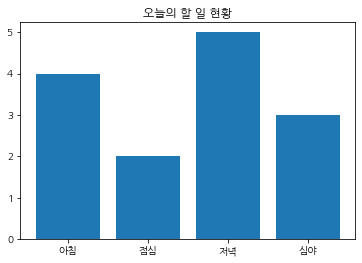

In [ ]:
import matplotlib.pyplot as plt

goodcount = [4, 2, 5, 3]
todolist = ['아침', '점심', '저녁', '심야']

plt.rcParams['axes.unicode_minus'] = False 
plt.rc('font', family = 'NanumGothic')
plt.title('오늘의 할 일 현황')
plt.bar(todolist, goodcount)
plt.show()

In [ ]:
goodcount = []
a = [[1, 2, 6, 3], [2, 1], [4, 6, 7, 8, 9], [3, 4, 2]]
for i in range(len(a)) :
  goodcount.append(len(a[i]))
print(goodcount)

[4, 2, 5, 3]
